In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

sns.set()

In [0]:
def activate(x, w):
  return activate_sigmoid(np.matmul(x, w))

def activate_sigmoid(x):
  return 1 / (1 + np.exp(-x))

def predict(x, w):
  return (activate(x,w) > 0.5).astype('int')

def loss_cross_entropy(y_star, y):
  return np.sum( y_train * np.log(1e-15 + prediction) )

def loss(y_star, y):
  return np.sum(np.power(y_star - y, 2)) * (1/y.shape[0])

def update_w(x, y, w, learning_rate=0.001):
  y_act = activate(x, w)

  out_delta = (y_act - y) * y_act * (1-y_act)
  
  wd = np.matmul(x.T, out_delta)

  wo = w - learning_rate * wd

  return wo

In [0]:
N = 1000

s = -np.pi/1.5
e = np.pi/1.5

x1 = [np.sin(np.linspace(s, e, N)), np.cos(np.linspace(s, e, N))]
x2 = [np.sin(np.linspace(s, e, N)), -np.cos(np.linspace(s, e, N))]

x1 = np.array(x1).T
x2 = np.array(x2).T

x1[:,0] -= 0.5
x2[:,0] += 0.5

x1[:,1] += 0.1
x2[:,1] -= 0.1

x1 += np.random.randn(x1.shape[0], x1.shape[1]) * 0.1
x2 += np.random.randn(x2.shape[0], x2.shape[1]) * 0.1

x = np.concatenate([x1, x2], axis=0)
y = np.concatenate([np.zeros((x1.shape[0],)), np.ones((x2.shape[0],))])

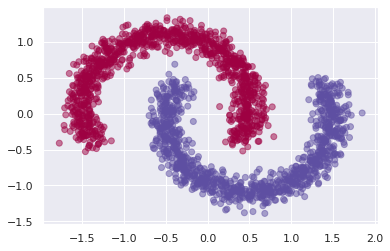

In [57]:
plt.scatter(x[:,0], x[:,1], c=y, alpha=0.5, cmap='Spectral')

In [0]:
shuffle_idx = np.arange(x.shape[0])
np.random.shuffle(shuffle_idx)

x = x[shuffle_idx]
y = y[shuffle_idx]

xn = np.concatenate([np.ones((x.shape[0], 1)), x], axis=1)

TRAIN_RATIO = 0.7
N_TRAIN = int(x.shape[0]*TRAIN_RATIO)

x_train = xn[0:N_TRAIN, :]
y_train= y[0:N_TRAIN]

x_test = xn[N_TRAIN:,:]
y_test = y[N_TRAIN:]

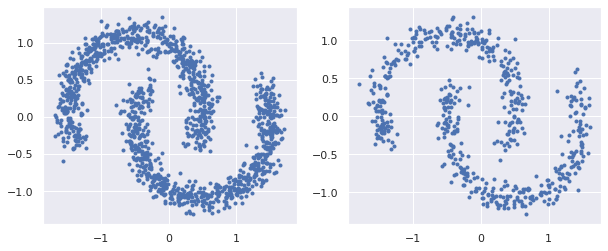

In [0]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(x_train[:,1], x_train[:, 2], '.')
plt.subplot(1,2,2)
plt.plot(x_test[:,1], x_test[:, 2], '.')

In [0]:
w = np.random.randn(xn.shape[1],)

learning_rate = 0.001

w_list = []
loss_list = []

for i in range(1000):
  prediction = predict(x_train, w)

  loss_list.append( loss_cross_entropy(prediction, y_train) )
  w_list.append(w)

  w = update_w(x_train, y_train, w, learning_rate=learning_rate)

print('Train Accuracy %.2f'% (1-loss(prediction, y_train)))
print('Test Accuracy %.2f'% (1-loss(predict(x_test,w), y_test)))

w_list = np.array(w_list)
loss_list = np.array(loss_list)

Train Accuracy 0.86
Test Accuracy 0.84


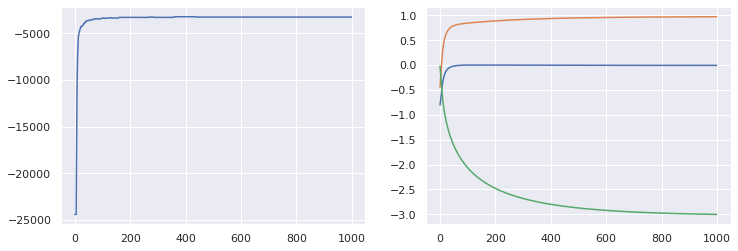

In [0]:
plt.figure(figsize=((12,4)))
plt.subplot(1,2,1)
plt.plot(loss_list)
plt.subplot(1,2,2)
plt.plot(w_list)

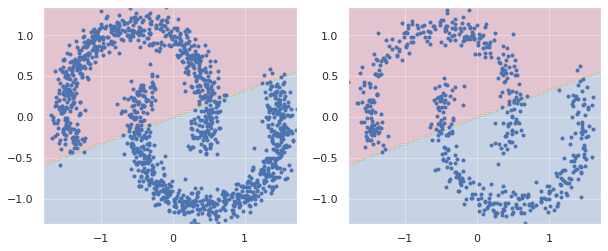

In [0]:
mesh_x, mesh_y = np.meshgrid(np.linspace(xn[:,1].min(), xn[:,1].max(), 100), 
                             np.linspace(xn[:,2].min(), xn[:,2].max(), 100))

xg = np.array([np.ones((mesh_x.shape[0] * mesh_x.shape[0])), 
          mesh_x.ravel(),
          mesh_y.ravel()]).T

z = predict(xg, w)
z = z.reshape(mesh_x.shape)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(x_train[:,1], x_train[:, 2], '.')
plt.contourf(mesh_x, mesh_y, z, cmap='Spectral', alpha=0.2)

plt.subplot(1,2,2)
plt.plot(x_test[:,1], x_test[:, 2], '.')
plt.contourf(mesh_x, mesh_y, z, cmap='Spectral', alpha=0.2)
